INFO: Calculation SRS set to: None
INFO: OpenDriftSimulation initialised
INFO: Opening dataset: /Users/hart-davis/Downloads/opendrift-master/tests/test_data/14Jan2016_NorKyst_z_3d/AROME_MetCoOp_00_DEF.nc_20160114_subset
INFO: Opening file with Dataset
DEBUG: Finding map projection.
DEBUG: Finding coordinate variables.
DEBUG: Setting buffer size 10 for reader /Users/hart-davis/Downloads/opendrift-master/tests/test_data/14Jan2016_NorKyst_z_3d/AROME_MetCoOp_00_DEF.nc_20160114_subset, assuming a maximum average speed of 5 m/s.
DEBUG: Creating Basemap...
INFO: Calculation SRS set to: +lon_0=5.0 +lat_ts=0.0 +R=6370997.0 +proj=merc +x_0=-0.0 +units=m +y_0=-8171229.35884 +ellps=WGS84 
DEBUG: Using srs for common grid: +lon_0=5.0 +lat_ts=0.0 +R=6370997.0 +proj=merc +x_0=-0.0 +units=m +y_0=-8171229.35884 
DEBUG: Added reader basemap_landmask
DEBUG: Setting buffer size 4 for reader /Users/hart-davis/Downloads/opendrift-master/tests/test_data/14Jan2016_NorKyst_z_3d/AROME_MetCoOp_00_DEF.nc_20160114

AttributeError: 'OpenOil' object has no attribute 'time'

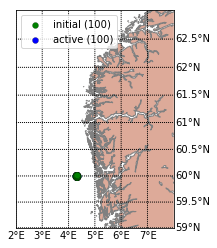

In [14]:
#!/usr/bin/env python
%matplotlib inline
import os
from opendrift.readers import reader_basemap_landmask
from opendrift.readers import reader_netCDF_CF_generic
from opendrift.models.openoil import OpenOil
import netCDF4 
from netCDF4 import date2index
import numpy as np
import xarray as xr, xray
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import datetime,timedelta
from matplotlib.pyplot import hold, figure, pcolor, colorbar, xlabel, ylabel, title, draw, quiver, show, savefig
import cmocean as cm
import matplotlib.patches as mpatches
import pandas


o = OpenOil(loglevel=0)  # Set loglevel to 0 for debug information

# Arome
reader_norkyst = reader_netCDF_CF_generic.Reader('/Users/hart-davis/Downloads/opendrift-master/tests/test_data/14Jan2016_NorKyst_z_3d/AROME_MetCoOp_00_DEF.nc_20160114_subset')
# Landmask (Basemap)
reader_basemap = reader_basemap_landmask.Reader(
                       llcrnrlon=2, llcrnrlat=59,
                       urcrnrlon=8, urcrnrlat=63,
                       resolution='h', projection='merc')
o.add_reader([reader_basemap, reader_norkyst])

############################################################
# Seed oil particles within contour detected from satellite
time = [reader_norkyst.start_time,
        reader_norkyst.start_time + timedelta(hours=10)]
############################################################
o.seed_elements(lon=4.3, lat=60, number=100, radius=1000,
                    time=reader_norkyst.start_time)
required_profiles = ['sea_water_temperature',
                     'sea_water_salinity',
                     'ocean_vertical_diffusivity']
required_profiles_z_range = [-120, 0]  # The depth range (in m) which
                                     
# Adjusting some configuration
o.set_config('processes:diffusion', True)
o.set_config('processes:dispersion', True)
o.set_config('processes:evaporation', False)
o.set_config('processes:emulsification', True)
o.set_config('drift:current_uncertainty', .3)  # Diffusion
o.set_config('drift:wind_uncertainty', 2)

# Running model (until end of driver data)
o.plot(background=['x_sea_water_velocity', 'y_sea_water_velocity'])
